In [1]:
import pandas as pd

In [2]:
df = pd.read_table('C:/Users/vbigand/Downloads/iris-data.txt',sep=",")
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df[df['class']=='Iris-setosa'].describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,49.000000,49.000000,49.000000,44.000000
mean,5.020408,3.410204,1.459184,0.250000
std,0.340942,0.380923,0.171899,0.111021
min,4.400000,2.300000,1.000000,0.100000
25%,4.800000,3.100000,1.400000,0.200000
50%,5.000000,3.400000,1.500000,0.200000
75%,5.200000,3.600000,1.500000,0.300000
max,5.800000,4.400000,1.900000,0.600000


In [4]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [5]:
df.loc[df['class']=='versicolor','class'] = 'Iris-versicolor'
df.loc[df['class']=='Iris-setossa','class'] = 'Iris-setosa'
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
df = df.loc[(df['class'] != 'Iris-setosa') | (df['sepal_width_cm']>=2.5)]

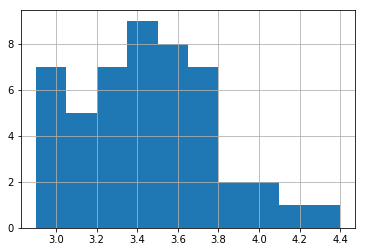

In [7]:
df.loc[df['class']=='Iris-setosa','sepal_width_cm'].hist()

In [8]:
df.loc[(df['class']=='Iris-versicolor') & (df['sepal_length_cm'] <1.0)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


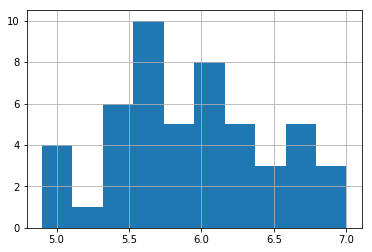

In [9]:
df.loc[(df['class']=='Iris-versicolor') & (df['sepal_length_cm'] <1.0),'sepal_length_cm'] *=100
df.loc[df['class']=='Iris-versicolor', 'sepal_length_cm'].hist() 

In [10]:
df.loc[(df['sepal_width_cm'].isnull()) |
      (df['sepal_length_cm'].isnull()) |
      (df['petal_width_cm'].isnull()) | 
      (df['petal_length_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


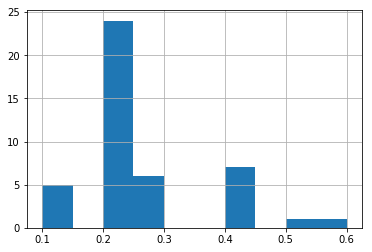

In [11]:
df.loc[df['class']=='Iris-setosa','petal_width_cm'].hist()

In [12]:
average_petal_width = df.loc[df['class']=='Iris-setosa','petal_width_cm'].mean()
print(average_petal_width)

0.24999999999999997


In [13]:
df['petal_width_cm'].fillna(average_petal_width,inplace = True)

In [14]:
df.to_csv('iris-data-clean.csv', index=False)
df = pd.read_csv('iris-data-clean.csv')

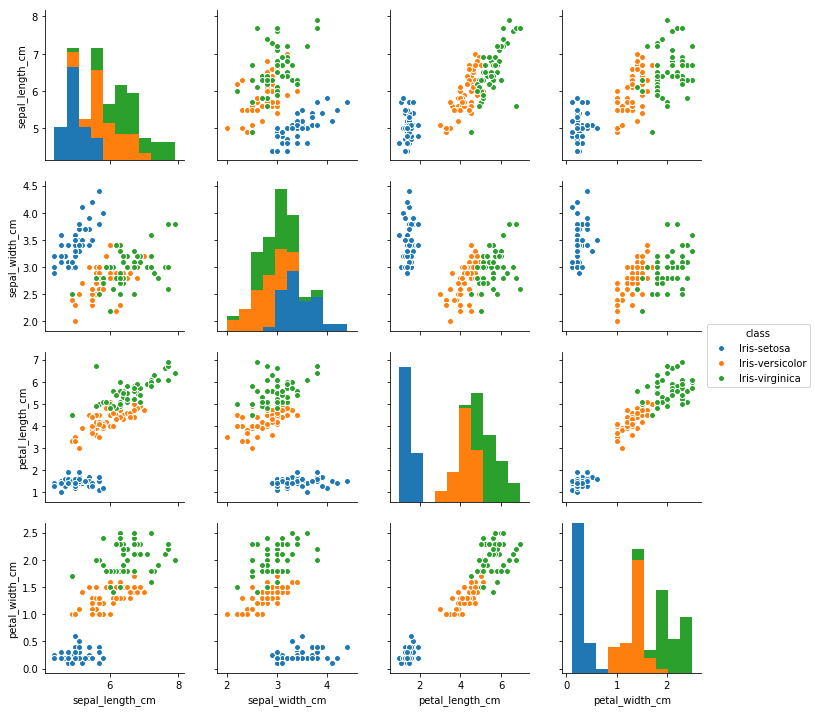

In [15]:
sb.pairplot(df, hue = 'class')

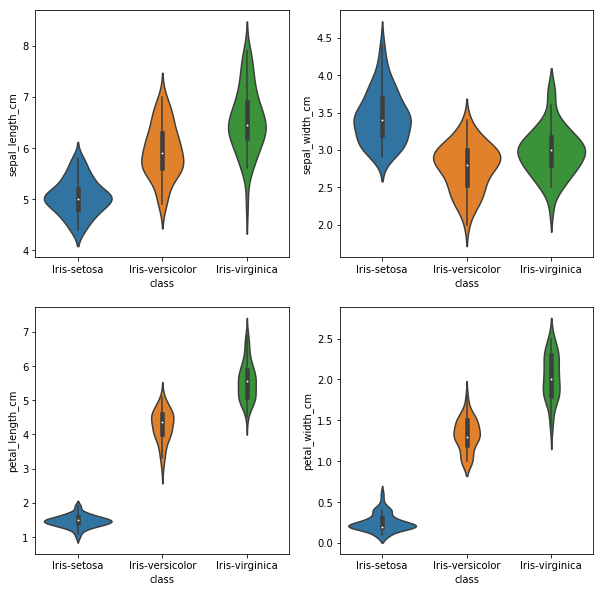

In [16]:
plt.figure(figsize=(10,10))
for column_index, column in enumerate(df.columns):
    if column =='class':
        continue
    plt.subplot(2,2,column_index+1)
    sb.violinplot(x='class', y = column, data = df)

In [17]:
features = df[['sepal_length_cm','sepal_width_cm','petal_length_cm','petal_width_cm']].values
target = df['class'].values
features[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [18]:
from sklearn.cross_validation import train_test_split

X_train,X_test,y_train,y_test = train_test_split(features,target,train_size = 0.75, random_state = 1)

C:\Users\vbigand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9736842105263158

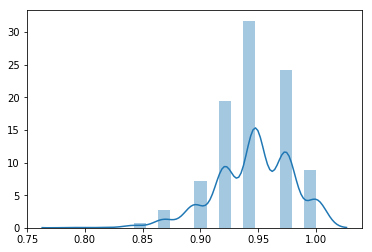

In [20]:
accuracies = []
for i in range(1000):
    X_train,X_test,y_train,y_test = train_test_split(features,target,train_size = 0.75)
    clf = DecisionTreeClassifier()
    clf.fit(X_train,y_train)
    accuracies.append(clf.score(X_test,y_test))
sb.distplot(accuracies)


Text(0.5,1,'Average Score : 0.9533333333333334')

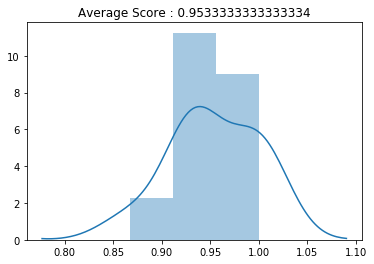

In [21]:
from sklearn.cross_validation import cross_val_score
import numpy as np

clf = DecisionTreeClassifier()
cv_scores = cross_val_score(clf,features,target,cv=10)
sb.distplot(cv_scores)
plt.title('Average Score : {}'.format(np.mean(cv_scores)))

In [22]:
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold

clf = DecisionTreeClassifier()
parameter_grid = {'max_depth':[1,2,3,4,5],
                 'max_features':[1,2,3,4]}
cross_val = StratifiedKFold(target,n_folds=10)

grid_search = GridSearchCV(clf, param_grid=parameter_grid,cv=cross_val)
grid_search.fit(features,target)
print('best score : {}'.format(grid_search.best_score_))
print('best parameters : {}'.format(grid_search.best_params_))

best score : 0.9664429530201343
best parameters : {'max_depth': 3, 'max_features': 3}


C:\Users\vbigand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


([<matplotlib.axis.YTick at 0x1cf49f8ad68>,
 <a list of 5 Text yticklabel objects>)

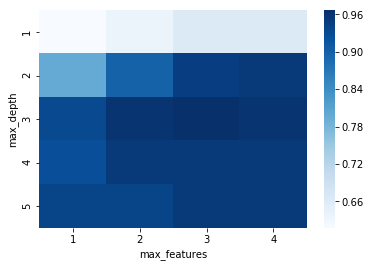

In [23]:
grid_visualization = []
for grid_pair in grid_search.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)
grid_visualization = np.array(grid_visualization)
grid_visualization.shape = (5,4)
sb.heatmap(grid_visualization, cmap='Blues')
plt.xlabel('max_features')
plt.ylabel('max_depth')
plt.xticks(np.arange(4)+0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5)+0.5, grid_search.param_grid['max_depth'])

In [24]:
clf = DecisionTreeClassifier()
parameter_grid = {'criterion':['gini','entropy'],
                  'splitter': ['best','random'],
                  'max_depth':[1,2,3,4,5],
                  'max_features':[1,2,3,4]}
cross_val = StratifiedKFold(target,n_folds=10)

grid_search = GridSearchCV(clf, param_grid=parameter_grid,cv=cross_val)
grid_search.fit(features,target)
print('best score : {}'.format(grid_search.best_score_))
print('best parameters : {}'.format(grid_search.best_params_))

best score : 0.9664429530201343
best parameters : {'criterion': 'gini', 'max_depth': 4, 'max_features': 2, 'splitter': 'best'}


In [25]:
clf = grid_search.best_estimator_
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [26]:
import sklearn.tree as tree
from sklearn.externals.six import StringIO

with open ('tree.dot','w') as out_file:
    out_file = tree.export_graphviz(clf,out_file=out_file)

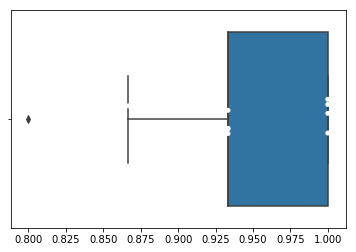

In [27]:
dt_scores = cross_val_score(clf,features,target,cv=10)
sb.boxplot(dt_scores)
sb.stripplot(dt_scores, jitter=True, color='white')

In [28]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
parameter_grid = {'n_estimators': [5, 10, 25, 50],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4],
                  'warm_start': [True, False]}
cross_val = StratifiedKFold(target,n_folds=10)

grid_search = GridSearchCV(clf, param_grid=parameter_grid,cv=cross_val)
grid_search.fit(features,target)
print('best score : {}'.format(grid_search.best_score_))
print('best parameters : {}'.format(grid_search.best_params_))

best score : 0.9664429530201343
best parameters : {'criterion': 'gini', 'max_features': 2, 'n_estimators': 5, 'warm_start': True}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0, warm_start=True)